# *Aufgabe: SVM und Interpretation ML*

0. Imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import time
import shap
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

/Users/lauraboenchen/Workspace/Digethic/full-stack-machine-learning/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Aufgabe 1. SVM

Wählen Sie einen beliebigen Regressionsdatensatz und trainieren Sie neben ausgewählten Modellen auch einen Support Vector Regressor. Stellen Sie sicher, dass neben Ihren selbst gewählten Modellen (bspw. kNN, Decision Tree, Random Forest, Boosting o.ä.) auch eine lineare oder polynomiale Regression gewählt ist. Vergleichen Sie das Ergebnis mit der passenden Metrik sowie der Rechenzeit Analyse.

In [2]:
# Diabetes Datensatz laden und vorbereiten
features, target = load_diabetes(return_X_y=True, as_frame=True)

X = features
x_train, x_test, y_train, y_test = train_test_split(features, target)

minmax = MinMaxScaler()

x_train = pd.DataFrame(minmax.fit_transform(x_train), columns=X.columns)
x_test = minmax.fit_transform(x_test)
print('X Train: {}'.format(x_train.shape))
print('Y Train: {}'.format(y_train.shape))
print('X Test: {}'.format(x_test.shape))
print('Y Test: {}'.format(y_test.shape))

X Train: (331, 10)
Y Train: (331,)
X Test: (111, 10)
Y Test: (111,)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

def mse(y_pred,y):
    return np.mean((y_pred-y)**2)

def train_evaluate_time(method: str) -> None:
    """Train, evaluate and time the method.

    Args:
        method (str): Name of the method in the methods dict.
    """
    start_time = time.time()
    methods[method].fit(x_train, y_train)
    running_time = round(time.time() - start_time,2)
    model_predict = methods[method].predict(x_test)
    model_mse = mse(model_predict,y_test)
    print("Genauigkeit von {}: {}; running time: {}".format(method, model_mse, running_time))

# Definiere mögliche Regressionsmethoden
methods = {
    "knn": KNeighborsRegressor(),
    "linregr": LinearRegression(),
    "tree": DecisionTreeRegressor(),
    "forest": RandomForestRegressor(),
    "ada": AdaBoostRegressor(),
    "svm": svm.SVR()
    }


for method in methods:
    train_evaluate_time(method)


Genauigkeit von knn: 3362.343783783784; running time: 0.0
Genauigkeit von linregr: 2821.240345599112; running time: 0.0
Genauigkeit von tree: 6419.7657657657655; running time: 0.0
Genauigkeit von forest: 3214.49814054054; running time: 0.22
Genauigkeit von ada: 3084.845564273423; running time: 0.05
Genauigkeit von svm: 5041.535409962829; running time: 0.0


### Aufgabe 2. Interpretation

Zeigen Sie grafisch die Relevanz der Features Ihres Datensatzes auf Grundlage des Modells auf. Verwenden Sie dafür bei der linearen Regression die Koeffizienter der Regression. Greifen Sie bei den anderen Modellen, wenn verfügbar, über feature_importances_ auf diese Information zu. Konsultieren Sie bei Fragen die Dokumentation von sklearn.

Using 331 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 331/331 [18:43<00:00,  3.39s/it]


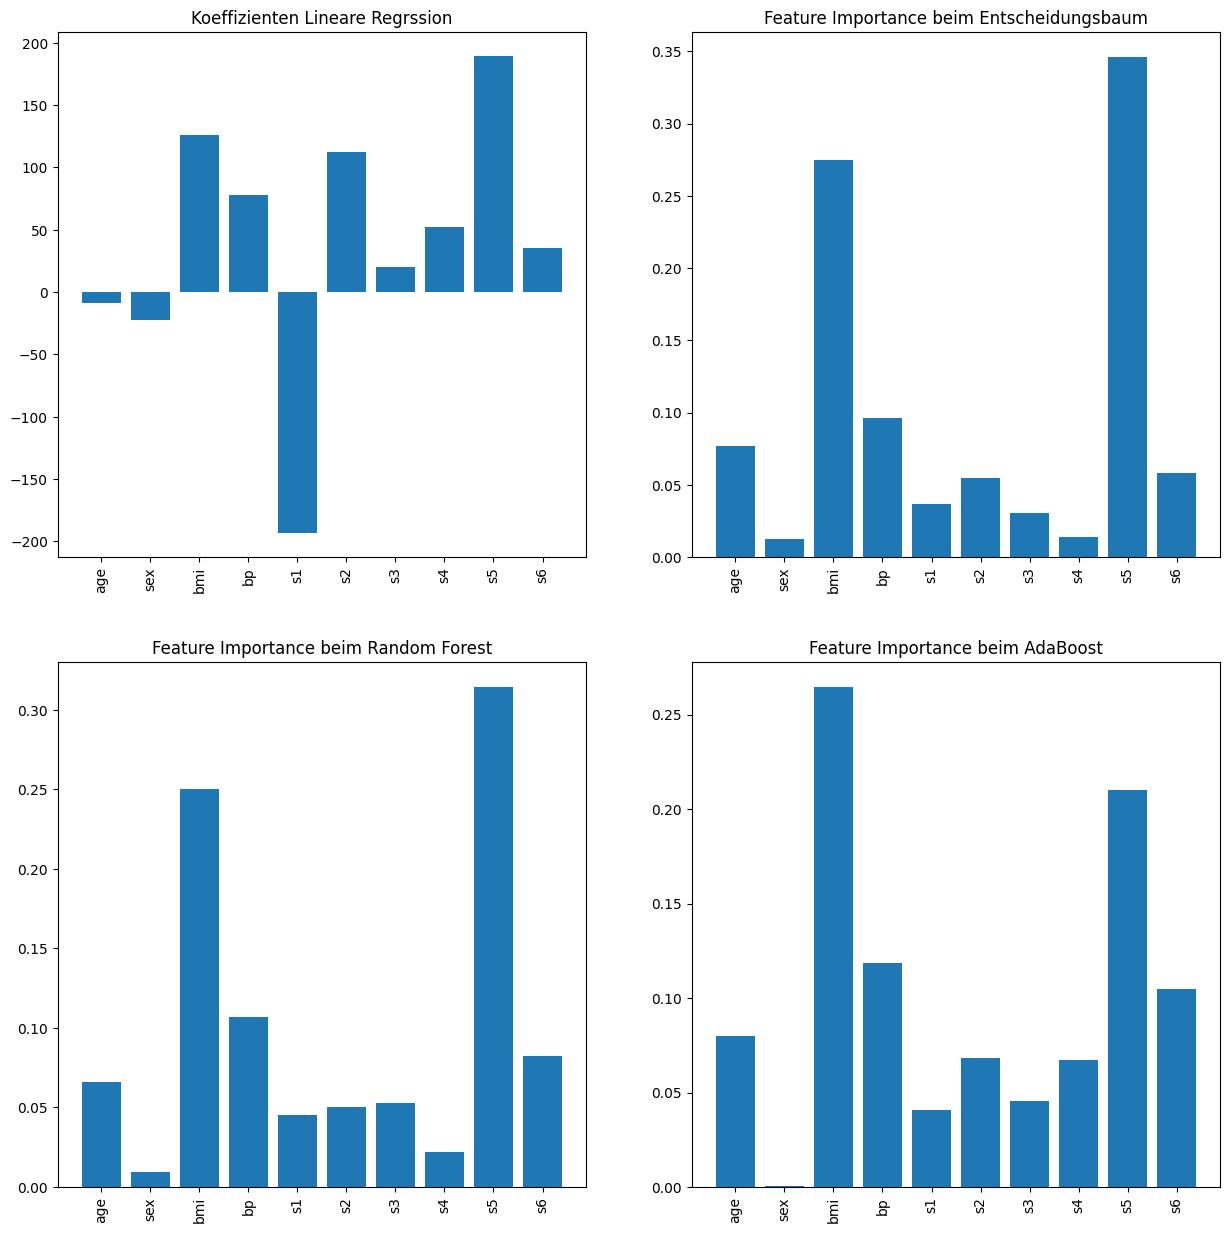

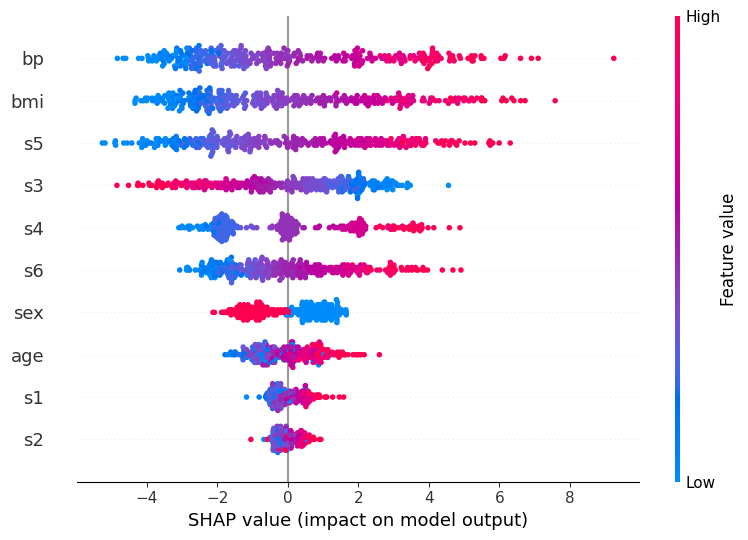

In [4]:
# Darstellung jeder Methode und die Wichtung der features
def plot_one_method(ax, title, x):
    ax.set_title(title)
    ticks = np.arange(1, len(x) + 1)
    ax.bar(ticks, x)
    ax.set_xticks(ticks=ticks, labels=list(x_train.columns), rotation=90)


fig, ax = plt.subplots(2,2, figsize=(15,15))

# Für lineare Regression nutze die Koeffizienten
plot_one_method(ax[0,0], "Koeffizienten Lineare Regrssion", methods["linregr"].coef_)

# Die folgenden Methoden berechnen automatisch die Feature Importance
plot_one_method(ax[0,1], "Feature Importance beim Entscheidungsbaum", methods["tree"].feature_importances_)
plot_one_method(ax[1,0], "Feature Importance beim Random Forest", methods["forest"].feature_importances_)
plot_one_method(ax[1,1], "Feature Importance beim AdaBoost", methods["ada"].feature_importances_)

# Shap value nehmen
# Für SVM können die SHAP values zur Interpretierbarkeit verwendet werden
explainer = shap.KernelExplainer(methods["svm"].predict, x_train)
shap_values = explainer.shap_values(x_train)
plt.figure(figsize=(10,10))
plt.title("SHAP Values: {}".format(method))
shap.summary_plot(shap_values, x_train)
plt.show()